## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='outer')

# Display the data table for preview
mouse_study_merged

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.
mouse_study = mouse_study_merged["Mouse ID"].nunique()
mouse_study

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_merged.loc[mouse_study_merged.duplicated(subset=["Mouse ID", "Timepoint"])]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_nodup = mouse_study_merged.loc[mouse_study_merged["Mouse ID"]!="g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_study_minone = mouse_study_nodup["Mouse ID"].nunique()
mouse_study_minone

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_mean = mouse_study_nodup.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_study_mean

mouse_study_median = mouse_study_nodup.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_study_median

mouse_study_var = mouse_study_nodup.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_study_var

mouse_study_std = mouse_study_nodup.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_study_std

mouse_study_sem = mouse_study_nodup.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mouse_study_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({"Mean": mouse_study_mean, "Median": mouse_study_median, "Variance": mouse_study_var, "Standard Deviation": mouse_study_std, "SEM": mouse_study_sem})
summary_table

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_group_by = mouse_study_nodup.groupby('Drug Regimen')
summary_table_two = mouse_study_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_two

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
mouse_study_total_unique = mouse_study_nodup.groupby("Drug Regimen").nunique()["Mouse ID"]
mouse_study_total_unique

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

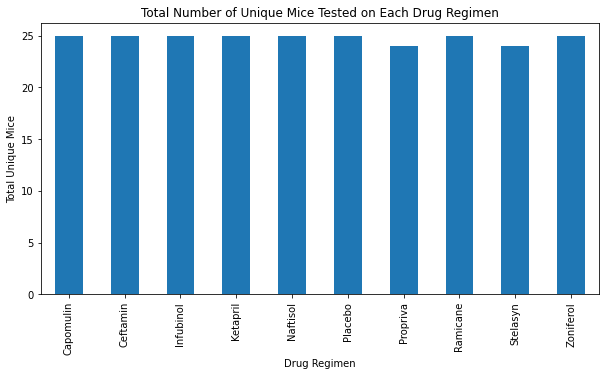

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar chart depicting the number of unique mice for each treatement regimen.
mouse_study_total_unique.plot(kind="bar", figsize=(10,5))

plt.title("Total Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Unique Mice")

plt.show()
plt.tight_layout()
                            


Text(0, 0.5, 'Total Unique Mice')

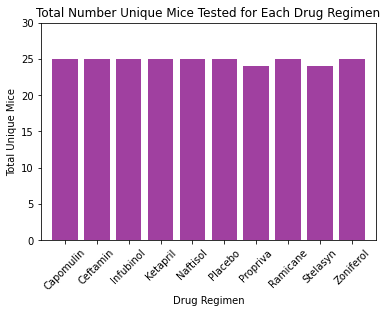

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_study = [25,25,25,25,25,25,24,25,24,25]

x_axis = np.arange(len(mouse_study_total_unique))

plt.bar(x_axis, drug_study, color='purple', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_study)+5)

plt.title("Total Number Unique Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Unique Mice")

In [12]:
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [13]:
groupby_gender = mouse_study_merged.groupby(["Mouse ID", "Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

Total Count  Percentage of Sex
Sex                                   
Female          124          49.799197
Male            125          50.200803

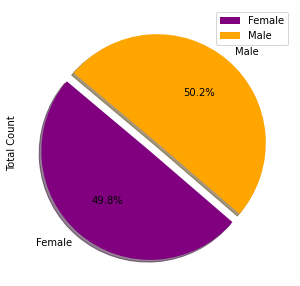

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['purple', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")



(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

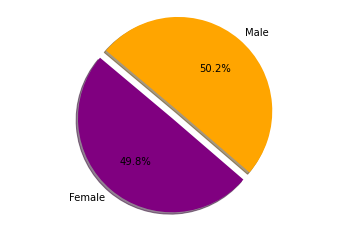

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ["Female", "Male"]

sizes = [49.799197,50.200803]

colors = ['purple', 'orange']

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_study_timepoint = mouse_study_nodup.groupby("Mouse ID").max()["Timepoint"]
mouse_study_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_study_timepoint_merge = pd.merge(mouse_study_nodup, mouse_study_timepoint, on=["Mouse ID", "Timepoint"])
mouse_study_timepoint_merge

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       b128         45           38.982878                 2    Capomulin   
1       f932          0           45.000000                 0     Ketapril   
2       g107         35           71.905117                 0     Ketapril   
3       a457         10           49.783419                 0     Ketapril   
4       c819         40           62.175705                 1     Ketapril   
..       ...        ...                 ...               ...          ...   
243     t565         45           34.455298                 0    Capomulin   
244     i557         45           47.685963                 1    Capomulin   
245     m957         45           33.329098                 1    Capomulin   
246     f966         20           30.485985                 0    Capomulin   
247     m601         45           28.430964                 1    Capomulin   

        Sex  Age_months  Weight (g)  
0    Female           9          22  
1      Male          15          29  
2    Female           2          29  
3    Female          11          30  
4      Male          21          25  
..      ...         ...         ...  
243  Female          20          17  
244  Female           1          24  
245  Female           3          19  
246    Male          16          17  
247    Male          22          17  

[248 rows x 8 columns]

In [41]:
# Put treatments into a list for for loop (and later for plot labels)

top_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_drug_regimens

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in top_drug_regimens:
    print(regimen)
    capomulin_df = mouse_study_timepoint_merge.loc[mouse_study_timepoint_merge["Drug Regimen"] == regimen]
    quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    upper_bound = upperq+(iqr*1.5)
    lower_bound = lowerq-(iqr*1.5)

    outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] > upper_bound) | (capomulin_df["Tumor Volume (mm3)"] < lower_bound), "Tumor Volume (mm3)"]
    print(f"The lower quartile of tumor size is:  {lowerq}")
    print(f"The upper quartile of tumor size is:  {upperq}")
    print(f"The interquartile range of tumor size is:  {iqr}")
    print(f"The median of tumor size is:  {quartiles[0.5]}")
    print("---------------------")
    print(f"Outliers are:  {outliers}")
    print()
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
The lower quartile of tumor size is:  32.37735684
The upper quartile of tumor size is:  40.1592203
The interquartile range of tumor size is:  7.781863460000004
The median of tumor size is:  38.125164399999996
---------------------
Outliers are:  Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane
The lower quartile of tumor size is:  31.56046955
The upper quartile of tumor size is:  40.65900627
The interquartile range of tumor size is:  9.098536719999998
The median of tumor size is:  36.56165229
---------------------
Outliers are:  Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol
The lower quartile of tumor size is:  54.04860769
The upper quartile of tumor size is:  65.52574285
The interquartile range of tumor size is:  11.477135160000003
The median of tumor size is:  60.16518046
---------------------
Outliers are:  29    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin
The lower quartile of tumor size is:  48.72207785
The upper quartile 

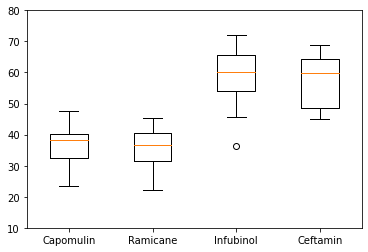

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_df = mouse_study_timepoint_merge.reset_index()
tumor_lists = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_drug_regimens)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_drug_regimens)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

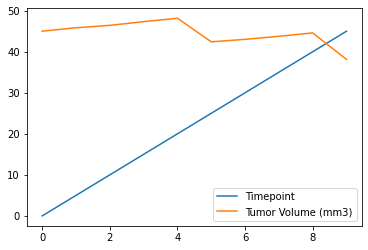

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_vs_tumor = mouse_study_nodup[mouse_study_nodup["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
